# Leetcode

In [6]:
numSlots = 9

In [7]:
2**numSlots

512

In [8]:
n = 18

In [9]:
9*18

162

In [10]:
n = 17*(17+1)//2

In [11]:
n

153

In [12]:
153+18+1

172

In [13]:
states = 172 

In [40]:
"""
The states for each slots
"""

512*172
from collections import defaultdict
import math
from functools import cache

In [75]:
def maximumANDSum(nums, numSlots):
    states = defaultdict(list)
    n = len(nums)
    for slot in range(1,numSlots+1):
        mask = 0
        sum_ = 0
        states[slot].append((mask,sum_))
        for i in range(n):
            sum_ += (slot&nums[i])
            mask|=(1<<i)
            states[slot].append((mask,sum_))
            for j in range(i+1,n):
                sum_ += (slot&nums[j])
                mask|=(1<<j)
                states[slot].append((mask,sum_))
                sum_ -= (slot&nums[j])
                mask^=(1<<j)
            sum_ -= (slot&nums[i])
            mask^=(1<<i)
    for slot in range(1,numSlots+1):
        states[slot].sort(key=lambda p: -p[1])
    print(states)
    @cache
    def dfs(slot,mask, found):
        if mask==0: 
            return 0
        if slot>numSlots: return -math.inf
        best = -math.inf
        for nmask, nsum in states[slot]:
            if (nmask&mask)==nmask:
                best = max(best, dfs(slot+1, mask^nmask, mask^nmask==0) + nsum)
            if found: return best
        return best
                
    return dfs(1,(1<<n)-1, False)
    

In [76]:
%%time
maximumANDSum([1,2,3,4,5,6],3)

defaultdict(<class 'list'>, {1: [(5, 2), (17, 2), (20, 2), (1, 1), (3, 1), (9, 1), (33, 1), (6, 1), (18, 1), (4, 1), (12, 1), (36, 1), (24, 1), (16, 1), (48, 1), (0, 0), (2, 0), (10, 0), (34, 0), (8, 0), (40, 0), (32, 0)], 2: [(6, 4), (34, 4), (36, 4), (3, 2), (5, 2), (33, 2), (2, 2), (10, 2), (18, 2), (4, 2), (12, 2), (20, 2), (40, 2), (48, 2), (32, 2), (0, 0), (1, 0), (9, 0), (17, 0), (8, 0), (24, 0), (16, 0)], 3: [(6, 5), (36, 5), (5, 4), (34, 4), (20, 4), (3, 3), (33, 3), (18, 3), (4, 3), (12, 3), (48, 3), (17, 2), (2, 2), (10, 2), (40, 2), (32, 2), (1, 1), (9, 1), (24, 1), (16, 1), (0, 0), (8, 0)]})
CPU times: total: 15.6 ms
Wall time: 3.28 ms


9

In [44]:
2**18*9

2359296

In [77]:
15*15

225

In [85]:
T = int(input())
for t in range(1,T+1):
    N, M = list(map(int,input().split()))
    sum_ = sum(num for num in map(int,input().split()))
    res = sum_-(sum_//M)*M
    print(f"Case #{t}: {res}")

 1
 5 10
 5 5 5 5 5


Case #1: 5


In [3]:
from typing import List
from math import inf
class Solution:
    def minimumFinishTime(self, tires: List[List[int]], changeTime: int, numLaps: int) -> int:
        go_straight = [inf for _ in range(19)] # at most go straight 18 times because it exceeds
        # the worse possible changeTime + tires.f = 1e5+1e5
        for f, r in tires:
            tot = cur = f
            go_straight[1] = min(go_straight[1], tot)
            print(go_straight)
            for i in range(2,19):
                cur *= r  # f*r^(i-1), so like i=2, so it is each successive lap
                tot += cur
                if tot > 2e5: # 2e5 is the maximum possible time for `changetime + best first step`.
                    break
                go_straight[i] = min(go_straight[i], tot) # update the minimum value 

        DP = [0 for _ in range(numLaps+1)]
        for i in range(1, numLaps + 1):
            # MAINTAIN SAME TIRES
            DP[i] = go_straight[i] if i < 19 else inf
            print("i", i)
            for j in range(1, i//2+1):
                print("j", j)
                print(f"DP[{j}] + {changeTime} + DP[{i-j}]")
                DP[i] = min(DP[i], DP[j] + changeTime + DP[i-j])
        return DP[-1]

In [25]:
sol = Solution()
sol.minimumFinishTime([[2,3],[3,4]], 5, 4)

[inf, 2, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
[inf, 2, 8, 26, 80, 242, 728, 2186, 6560, 19682, 59048, 177146, inf, inf, inf, inf, inf, inf, inf]
i 1
i 2
j 1
DP[1] + 5 + DP[1]
i 3
j 1
DP[1] + 5 + DP[2]
i 4
j 1
DP[1] + 5 + DP[3]
j 2
DP[2] + 5 + DP[2]


21

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

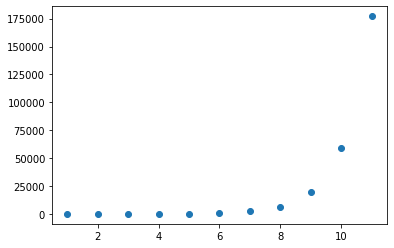

In [21]:
go_straight = [inf, 2, 8, 26, 80, 242, 728, 2186, 6560, 19682, 59048, 177146, inf, inf, inf, inf, inf, inf, inf]
plt.scatter([i for i in range(19)], go_straight);

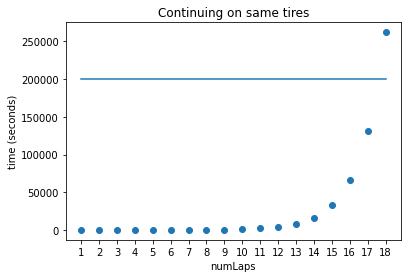

In [26]:
# worse case analysis
go_straight = [2**i for i in range(1,19)]
# when I would not want to change tires
most_expensive_change_tires = 200000
plt.plot([i for i in range(1,19)], [most_expensive_change_tires for _ in range(1,19)])
plt.scatter([i for i in range(1,19)], go_straight)
plt.xlabel('numLaps')
plt.ylabel('time (seconds)') 
plt.xticks([i for i in range(1,19)], [i for i in range(1,19)])
plt.title('Continuing on same tires')
plt.show()

131072